In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [2]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv(r'C:\Users\Admin\Documents\New folder\OneDrive\Multiple disease prediction\Data\headbrain.csv')


In [3]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),Class
0,0,2,2720,955,0
1,0,2,2773,1076,0
2,0,1,2857,1027,0
3,0,2,2864,1012,0
4,0,2,2937,1070,0


In [4]:
data.shape

(236, 5)

In [5]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),Class
count,236.000000,236.000000,236.000000,236.000000,236.000000
mean,0.563559,1.538136,3629.275424,1281.381356,0.139831
std,0.496998,0.499603,358.733690,118.378975,0.347548
min,0.000000,1.000000,2720.000000,955.000000,0.000000
25%,0.000000,1.000000,3387.500000,1206.500000,0.000000
50%,1.000000,2.000000,3613.500000,1280.000000,0.000000
75%,1.000000,2.000000,3868.500000,1350.000000,0.000000
max,1.000000,2.000000,4512.000000,1620.000000,1.000000


In [6]:
# checking for missing values in each column
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
Class                  0
dtype: int64

In [7]:
# Features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
print("Class Distribution:\n", y.value_counts())


Class Distribution:
 Class
0    203
1     33
Name: count, dtype: int64


In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Optional: Verify new distribution
from collections import Counter
print(Counter(y_resampled))


Counter({0: 203, 1: 203})


In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy score of brain normalcy's model :", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy score of brain normalcy's model : 0.9791666666666666
[[40  1]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.88      1.00      0.93         7

    accuracy                           0.98        48
   macro avg       0.94      0.99      0.96        48
weighted avg       0.98      0.98      0.98        48



In [13]:
# ✅ Apply SMOTE ONLY ON TRAINING DATA
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [14]:

# # Fit the pipeline on the resampled training data
# pipeline.fit(X_train_res, y_train_res)

In [15]:
# Evaluate
# y_pred = pipeline.predict(X_test)
# print(classification_report(y_test, y_pred))

In [16]:
# Evaluation
# print("\nAccuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

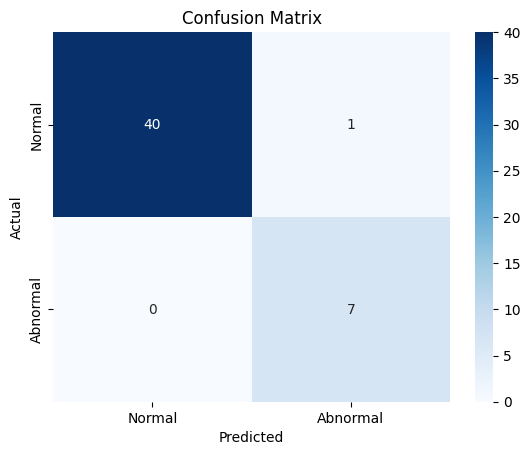

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
import pickle

In [19]:
filename = 'headbrain_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
# loading the saved model
loaded_model = pickle.load(open('headbrain_model.sav', 'rb'))